<div style="text-align: right"> Mark Hendricks </div>

<left>FINM 36700</left> 
<br>
<left>Autumn 2020</left>

<h2><center>Homework # 4</center></h2>

<center>Due on Wednesday, October 28, at 6:00pm.</center>

<h3><center><span style="color:#00008B">Solution</span></center></h3>

**AQR's Momentum Funds (A) [9-211-025].**


### 2 Investigating Momentum


***1. Is momentum still profitable?***

The excess returns of lucrative trading strategies often disappear once the strategy is well-known.
The first widely-cited paper on momentum was published in 1993. Have momentum returns or
risk changed since then? The AQR case takes place at the end of 2008. Have momentum returns
changed in 2009-2020?

Investigate by filling out the summary statistics below for the full-sample and three sub-samples.

(a) Using the data provided, fill in Table 1 with the appropriate stats for $\tilde{r}^{rmom:FF}$.

(b) Has momentum changed much over time, as seen through these subsample statistics?

(c) Does this data support AQR's argument that momentum is an important piece of the ideal
portfolio? What if mean returns to momentum are in actuality near zero due to transaction
costs - would there still be evidence here that momentum is valuable?

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('display.float_format', lambda x: '%.4f' % x)

from dataclasses import dataclass
import warnings

In [2]:
path = 'momentum_data.xlsx'
path2 = 'ff_data.xlsx'
df_factor = pd.read_excel(path, sheet_name='Momentum Factor').set_index('date')
temp = pd.read_excel(path2, sheet_name='FACTORS').set_index('date')
df_factor = df_factor.join(temp)
# display(df_factor.head(1))

temp = pd.read_excel(path2, sheet_name='PORTFOLIOS').set_index('date')
temp.columns = temp.columns.str.strip()
ind_portfolios_names = temp.columns.values
df_industries = df_factor.join(temp)
# display(df_industries.head(1))

temp = pd.read_excel(path, sheet_name='Momentum Deciles').set_index('date')
temp.columns = temp.columns.str.strip()
df_momentum = df_factor.join(temp)
# display(df_momentum.head(1))

temp = pd.read_excel(path, sheet_name='Momentum by Size').set_index('date')
temp.columns = temp.columns.str.strip()
mom_size_portfolio_names = temp.columns
df_mom_size = df_factor.join(temp)
# display(df_mom_size.head(1))

del temp

In [3]:
df_mom_size.columns

df_mom_size['rx_mom_FF'] = (1/2 *(df_mom_size['Big Up'] + df_mom_size['Small Up']) -
  1/2 * (df_mom_size['Big Down'] + df_mom_size['Small Down']))

def table_row(df, portfolio, annualize_factor=12):
    mean = df[portfolio].mean() * annualize_factor
    vol = df[portfolio].std() * np.sqrt(annualize_factor)
    sharpe_ratio = mean/vol
    skew = df[portfolio].skew() #unscaled
    corr = df[[portfolio, 'MKT', 'HML']].corr()
    corr_to_mkt = corr.loc[portfolio, 'MKT']
    corr_to_value = corr.loc[portfolio, 'HML']
    return [mean, vol, sharpe_ratio, skew, corr_to_mkt, corr_to_value]


table1 = pd.DataFrame(index=['1927-2020', '1927-1993', '1994-2008', '2009-2020'],
    columns=['mean ', 'vol ', 'sharpe_ratio ', 'skew ', 'corr_to_mkt ', 'corr_to_value', ])

table1.loc['1927-2020', :] = table_row(df_mom_size.loc['1927':'2020',:], portfolio='rx_mom_FF')
table1.loc['1927-1993', :] = table_row(df_mom_size.loc['1927':'1993',:], portfolio='rx_mom_FF')
table1.loc['1994-2008', :] = table_row(df_mom_size.loc['1994':'2008',:], portfolio='rx_mom_FF')
table1.loc['2009-2020', :] = table_row(df_mom_size.loc['2009':'2020',:], portfolio='rx_mom_FF')
table1.style.set_caption('Solution Table 1: Momentum performance over time.')

,mean,vol,sharpe_ratio,skew,corr_to_mkt,corr_to_value
1927-2020,0.079562,0.162642,0.489189,-3.000648,-0.340540,-0.411402
1927-1993,0.090012,0.159458,0.564486,-3.753852,-0.361483,-0.485098
1994-2008,0.103223,0.175045,0.589696,-0.560066,-0.232436,-0.110042
2009-2020,-0.010869,0.162982,-0.066686,-2.957114,-0.354132,-0.445664


<span style="color:#00008B">**Solution:**</span>

<span style="color:#00008B"> (a) See Solution Table 1, which gives stats of the monthly returns. (All but skewness are annualized.)</span>
 
<span style="color:#00008B"> (b) Momentum's performance has been fairly consistent over the entire sample
except that in the past 11 years the mean return has been very poor. This is driven mostly by the year 2009. Note that even in the final subsample the correlations to the market and value are close to their usual values, and the overall volatility is close to the usual.</span>

<span style="color:#00008B"> (c) The persistent performance over time (except for the 2009 crash which causes low mean return in 2009-2020) seems to support the idea that momentum is not just a
statistical anomaly. Even in the final subsample, it gives negative correlation to the market
and value to the point it is valuable to a mean-variance investor even with a mean return
near zero.</span>

***2. The case is about whether a long-only implementation of momentum is valuable.***

Construct your own long-only implementation:,

$$ \tilde{r}^{momU:FF} = \frac{1}{2} \left( r^{momBU} + r^{momSU} \right) - r^f $$

Note that this is following the FF approach of treating big and small stocks separately. This
would be very similar to a scaled version of,

$$ \tilde{r}^{momU} = \frac{1}{3} \left( r^{mom(8)} + r^{mom(9)} + r^{mom(10)} \right) - r^f $$

For the question below, use the FF-style, $\tilde{r}^{momU:FF}_t$.

(a) Fill out Table 2 using the full sample of data.

(b) Is long-only momentum as attractive as long-short momentum with respect to mean, volatility,
and Sharpe Ratio?

(c) Is long-only momentum as diversifying as long-short momentum with respect to market
and value premia?

(d) Show a plot of the cumulative product of $1 + \tilde{r}^{mom:FF}$ and $1 + \tilde{r}^{momU:FF}$ over the 2006-2020 subsample.

In [4]:
df_mom_size['rx_mom_U_FF'] = (1/2 * (df_mom_size['Big Up'] + df_mom_size['Small Up']) -
    df_mom_size['RF'])

table2 = pd.DataFrame(index=['long_short', 'long_only'],
    columns=['mean ', 'vol ', 'sharpe_ratio ', 'skew ', 'corr_to_mkt ', 'corr_to_value', ])

table2.loc['long_short', :] = table_row(df_mom_size, portfolio='rx_mom_FF')
table2.loc['long_only', :] = table_row(df_mom_size, portfolio='rx_mom_U_FF')
table2.style.set_caption('Solution Table 2: Long-only momentum performance.')

,mean,vol,sharpe_ratio,skew,corr_to_mkt,corr_to_value
long_short,0.079562,0.162642,0.489189,-3.000648,-0.340540,-0.411402
long_only,0.135502,0.213269,0.635356,-0.024943,0.936633,0.212936


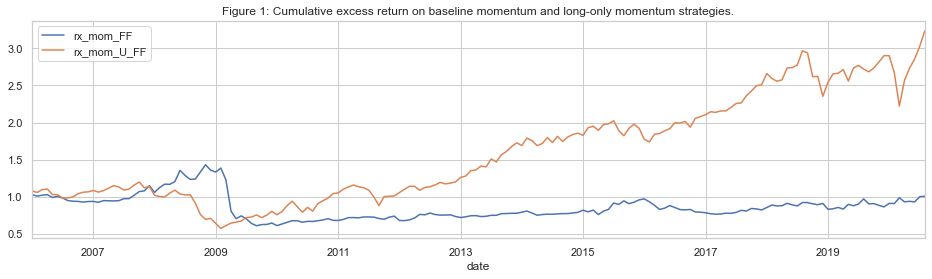

In [5]:
sns.set_style("whitegrid")
(df_mom_size.loc['2006':'2020', 'rx_mom_FF'] + 1).cumprod().plot(figsize=(16,4))
(df_mom_size.loc['2006':'2020', 'rx_mom_U_FF'] + 1).cumprod().plot(figsize=(16,4))
plt.title('Figure 1: Cumulative excess return on baseline momentum and long-only momentum strategies.')
plt.legend();

<span style="color:#00008B">**Solution:**</span>

<span style="color:#00008B"> (a) See Solution Table 2, which gives stats of the monthly returns. (All but skewness are annualized.) </span>
    
<span style="color:#00008B"> (b) The mean, vol, and Sharpe ratio are higher in the long-only strategy. It also has much less skewness. On these measures, it looks even more attractive. </span>
    
<span style="color:#00008B"> (c) The long-only strategy is extremely correlated with the market and thus should not be promoted based on its diversification to the market. The long-short strategy has
almost no market correlation and substantially negative correlation to value. </span>
    
<span style="color:#00008B"> (d) See Figure 1. There one sees that the long-and-short momentum strategy suffered massive losses in 2009, (roughly -80% return,) while the long-only strategy was down about 50%
in 2008 and up in 2009. This is a good illustration of the long-only strategy having less skewness.</span>

***3. Is momentum just data mining, or is it a robust strategy?***

The FF momentum factor, $\tilde{r}^{mom:FF}$ does two things that AQR may reconsider for their own
long-only product:
 - Segment by size. That is, use $\tilde{r}^{mom:FF}$ instead of using \tilde{r}^{mom} as defined above.
 - Use the top and bottom three deciles. For a more concentrated loading of momentum, we could try going long the top-ranked decile and shorting the bottom-ranked decile:

$$ \tilde{r}^{mom10-1} = r^{mom(10)} - r^{mom(1)} $$

(a) Compare all three constructions, (in the full-sample period,) by filling out the stats in the
table below.

(b) Based on the stats above, how sensitive are the momentum returns to segmenting for size
as FF do, versus just doing the unsegmented, three-decile construction in $\tilde{r}^{mom}$?

(c) Based on the stats above, should AQR's retail product consider using a 1-decile construction
as in $\tilde{r}^{mom10-1}$?

Do the tradeoffs between the 3-decile and 1-decile constructions line up with the theoretical
tradeoffs we discussed in the lecture?

In [6]:
df_momentum['rx_mom_10_1'] = df_momentum['Decile 10'] - df_momentum['Decile 1']
table3 = pd.DataFrame(index=['rx_mom_FF', 'rx_mom', 'rx_mom_10_1'],
    columns=['mean ', 'vol ', 'sharpe_ratio ', 'skew ', 'corr_to_mkt ', 'corr_to_value', ])

df = df_mom_size.join(df_momentum, rsuffix='momentum_')
df['rx_mom'] = (1/3 * (df['Decile 8'] + df['Decile 9'] + df['Decile 10']) -\
                1/3 * (df['Decile 1'] + df['Decile 2'] + df['Decile 3']))
table3.loc['rx_mom_FF', :] = table_row(df, portfolio='rx_mom_FF')
table3.loc['rx_mom', :] = table_row(df, portfolio='rx_mom')
table3.loc['rx_mom_10_1', :] = table_row(df, portfolio='rx_mom_10_1')
table3.style.set_caption('Table 3: Robustness of momentum construction.')

,mean,vol,sharpe_ratio,skew,corr_to_mkt,corr_to_value
rx_mom_FF,0.079562,0.162642,0.489189,-3.000648,-0.340540,-0.411402
rx_mom,0.082383,0.189214,0.435395,-2.592064,-0.378286,-0.399654
rx_mom_10_1,0.141416,0.271691,0.520504,-2.278312,-0.370007,-0.402767


<span style="color:#00008B">**Solution:**</span>

<span style="color:#00008B"> (a) See Table 3, which gives stats of the monthly returns. (All but skewness are annualized.) </span>
    
<span style="color:#00008B"> (b) There is very little difference between the three constructions. It seems momentum is fairly robust to the exact definition. </span>
    
<span style="color:#00008B"> (c) The performance of the 1-decile construction is a little stronger, but not enough to be worth taking on high concentrations in individual stocks for a retail product.
The lecture implies that the more extreme the cutoff for the "winners", the higher the mean
return of the momentum portfolio. The downside is that we would expect higher volatility.
This is consistent with what we see here. </span>

***4. In conclusion, what is your assessment of the AQR retail product? Is it capturing the important
features of the Fama-French construction of momentum? Would you suggest any modifications?***

<span style="color:#00008B">**Solution:** The AQR retail product is substantially different from what we typically refer to as momentum. Though it has strong expected returns, it is almost all from market premium. This is a feature of being long-only and won't be fixed by modifying the exact constructions decile, sorting by size, etc. </span>

### 3 Momentum in the LFPM

On Canvas, find the data files, **"FF data.xlsx"** and **"momentum data.xlsx"**.

 - From the **"FF data.xlsx"** file, get the market, size, and value factors. From the **"momentum
data.xlsx"** file, get the momentum factor from the first tab.
 - From the **"FF data.xlsx"** file, get the 25 test portfolios, $\tilde{r}^i$.
 
We want to test the 4-factor model on $i = 1 \dots 25$ industry portfolios.

$$E\left[\tilde{r}^i\right] = \beta^{i,m}\lambda^{m} + \beta^{i,s}\lambda^{s} + \beta^{i,v}\lambda^{v} + \beta^{i,mom:FF}\lambda^{mom:FF} $$

For the factor premia, we will just use the time-series averages. Thus, for $\lambda^m$, we have:

$$ \hat{\lambda}^m = \hat{E} \left[ \tilde{r}^m \right] = \frac{1}{T} \sum_{t=1} \tilde{r}^m_t $$

No need for the extra cross-sectional regression.

   1. Calculate the factor premia, $\lambda$, from the sample averages of the factors.
   
   2. For each of the $n = 25$ test portfolios, run the LFPM time-series regression:
   
   $$ \tilde{r}_t^i = \alpha^i + \beta^{i,m}\tilde{r}_t^m + \beta^{i,s}r_t^s + \beta^{i,v}r_t^v + \beta^{i,mom:FF}r_t^{mom:FF} + \epsilon_t^i $$
   
So you are running 25 separate regressions, each using the $T$-sized sample of time-series data.

3. Use your estimates for $\beta$ and $\lambda$ to calculate the LFPM-implied expected excess return for each test portfolio.

$$ \hat{E}^{LFPM}\left[\tilde{r}^i\right] = \hat{\beta}^{i,m} \hat{\lambda}^m + \hat{\beta}^{i,s} \hat{\lambda}^s + \hat{\beta}^{i,v} \hat{\lambda}^v + \hat{\beta}^{i,mom:FF} \hat{\lambda}^{mom:FF} $$

4. Calculate the sample average of the excess return on each test portfolio, $\hat{E}\left[ \tilde{r}^i \right] $

5. Make a scatter plot for the 25 test portfolios, with their LFPM-implied premia, $\hat{E}^{LFPM}\left[\tilde{r}^i\right]$, on the horizontal axis and their sample-averages, $\hat{E}\left[\tilde{r}^i\right]$, on the vertical axis. In addition to putting the 25 test portfolios in your scatter plot, also include the 4 factors themselves.

6. Report the mean-absolute-error of the LFPM:
$$ MAE = \frac{1}{n} \sum_{i=1}^n |\alpha_i| $$


7. Compare your MAE to that obtained from estimating the CAPM on these portfolios, which you
did in the previous homework. How much do the extra factors help in explaining risk premia for these 25 industry portfolios?

In [7]:
@dataclass
class RegressionsOutput:
    excess_ret_stats: pd.DataFrame
    params: pd.DataFrame
    residuals: pd.DataFrame
    tstats: pd.DataFrame
    other: pd.DataFrame

def lfm_time_series_regression(df, portfolio_names, factors, annualize_factor=12):
    excess_ret_stats = pd.DataFrame(index=factors, columns=['average', 'std'], dtype=float)
    for factor in factors:
        excess_ret_stats.loc[factor, 'average'] = annualize_factor * df[factor].mean()
        excess_ret_stats.loc[factor, 'std'] = np.sqrt(annualize_factor) * df[factor].std()
        excess_ret_stats.loc[factor, 'sharpe_ratio'] = \
            excess_ret_stats.loc[factor, 'average'] / excess_ret_stats.loc[factor, 'std']
        # Here I'll just report the unscaled skewness
        excess_ret_stats.loc[factor, 'skewness'] = df[factor].skew()
        # excess_ret_stats.loc[factor, 'skewness'] = annualize_factor * df[factor].skew()

    _temp_excess_ret_stats = excess_ret_stats.copy()
    _temp_excess_ret_stats.loc['const', :] = 0

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        rhs = sm.add_constant(df[factors])
    portfolio_params = pd.DataFrame(columns=portfolio_names)
    portfolio_other = pd.DataFrame(columns=portfolio_names)
    portfolio_residuals = pd.DataFrame(columns=portfolio_names)
    portfolio_tstats = pd.DataFrame(columns=portfolio_names)
    
    for portfolio in portfolio_names:
        lhs = df[portfolio]
        res = sm.OLS(lhs, rhs, missing='drop').fit()
        portfolio_params[portfolio] = res.params
        portfolio_params.loc['const', portfolio] = annualize_factor * res.params['const']
        portfolio_other.loc['r_squared', portfolio] = res.rsquared
        portfolio_other.loc['model_implied_excess_ret', portfolio] = portfolio_params[portfolio] @ _temp_excess_ret_stats['average']
        portfolio_other.loc['ave_excess_ret', portfolio] = \
            annualize_factor * df[portfolio].mean()
        portfolio_other.loc['std_excess_ret', portfolio] = \
            np.sqrt(annualize_factor) * df[portfolio].std()
        portfolio_other.loc['skewness_excess_ret', portfolio] = \
            annualize_factor * df[portfolio].skew()
        portfolio_other.loc['sharpe_ratio', portfolio] = \
            portfolio_other.loc['ave_excess_ret', portfolio] / portfolio_other.loc['std_excess_ret', portfolio]
        portfolio_residuals[portfolio] = res.resid
        portfolio_tstats[portfolio] = res.tvalues

    regression_outputs = RegressionsOutput(
        excess_ret_stats.T,
        portfolio_params.T,
        portfolio_residuals,
        portfolio_tstats.T,
        portfolio_other.T)

    return regression_outputs

df_industries['rx_mom_FF'] = df_mom_size['rx_mom_FF']

reg_4_factor = lfm_time_series_regression(
    df=df_industries,
    portfolio_names=ind_portfolios_names,
    factors=['MKT', 'HML', 'SMB', 'rx_mom_FF'])

reg_1_factor = lfm_time_series_regression(
    df=df_industries,
    portfolio_names=ind_portfolios_names,
    factors=['MKT'])

In [8]:
# (1)
reg_4_factor.excess_ret_stats
table4 = pd.DataFrame(reg_4_factor.excess_ret_stats.loc['average', :]).T
table4.style.set_caption('Solution Table 4: Factor premia per sample averages.')

,MKT,HML,SMB,rx_mom_FF
average,0.080448,0.038995,0.023349,0.079562


In [9]:
# (2)
table5 = reg_4_factor.params
table5.style.set_caption('Solution Table 5: LFPM regression results for each industry portfolio w.r.t. the LFPM.')

,const,MKT,HML,SMB,rx_mom_FF
SMALL LoBM,-0.030508,1.241522,0.330786,1.434704,-0.152879
ME1 BM2,-0.012412,1.072740,0.217855,1.534777,0.000343
ME1 BM3,0.034004,1.018063,0.452337,1.228078,-0.135011
ME1 BM4,0.043934,0.937771,0.572155,1.222985,-0.014287
SMALL HiBM,0.050621,0.970095,0.887752,1.297344,-0.047133
ME2 BM1,0.008601,1.077268,-0.234477,1.123817,-0.026340
ME2 BM2,0.040230,1.005084,0.114716,0.986830,-0.041079
ME2 BM3,0.036278,0.983993,0.359632,0.811039,0.003774
ME2 BM4,0.034721,0.965802,0.580164,0.823771,0.026341
ME2 BM5,0.038836,1.062846,0.865531,0.908982,-0.026775


In [10]:
# (3)
table6 = pd.DataFrame(reg_4_factor.other['model_implied_excess_ret'])
table6.style.set_caption('Solution Table 6: LFPM-implied expected excess return for each test portfolio.')

,model_implied_excess_ret
SMALL LoBM,0.134112
ME1 BM2,0.130657
ME1 BM3,0.117472
ME1 BM4,0.125171
SMALL HiBM,0.139201
ME2 BM1,0.101665
ME2 BM2,0.105103
ME2 BM3,0.112421
ME2 BM4,0.121650
ME2 BM5,0.138348


In [11]:
# (4)
table7 = pd.DataFrame(reg_4_factor.other['ave_excess_ret'])
table7.style.set_caption('Solution Table 7: sample average of the excess return on each test portfolio.')

,ave_excess_ret
SMALL LoBM,0.103604
ME1 BM2,0.118246
ME1 BM3,0.151476
ME1 BM4,0.169105
SMALL HiBM,0.189822
ME2 BM1,0.110266
ME2 BM2,0.145333
ME2 BM3,0.148699
ME2 BM4,0.156371
ME2 BM5,0.177184


c:\users\zhiwei hu\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


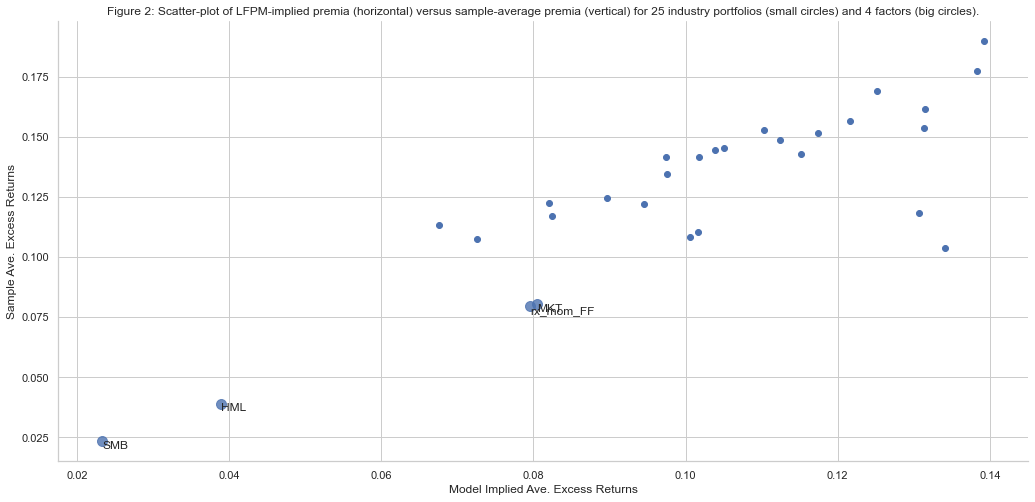

In [12]:
# (5)
factor_averages = reg_4_factor.excess_ret_stats.loc[['average'], :].T.reset_index()

sns.set_style("whitegrid")
ax = sns.lmplot('average', # Horizontal axis
           'average', # Vertical axis
           data=factor_averages, # Data source
           fit_reg=False, # Don't fix a regression line
           scatter_kws={"s": 100}) # size and dimension
ax.fig.set_figwidth(16)
ax.fig.set_figheight(7)
plt.title('Actual Returns Vs. Model Implied Returns')
# Set x-axis label
plt.xlabel('Model Implied Ave. Excess Returns')
# Set y-axis label
plt.ylabel('Sample Ave. Excess Returns')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], point['val'])

label_point(factor_averages.average, factor_averages.average-.003,
    pd.Series(factor_averages['index']), plt.gca())

plt.plot(reg_4_factor.other['model_implied_excess_ret'], reg_4_factor.other['ave_excess_ret'], 'o');
plt.title('Figure 2: Scatter-plot of LFPM-implied premia (horizontal) versus sample-average premia (vertical) for 25 industry portfolios (small circles) and 4 factors (big circles).')
None

In [13]:
# (6)
MAE_4_factor = reg_4_factor.params['const'].abs().mean()
print('MAE(LFPM) = {:.3f}'.format(MAE_4_factor))

MAE(LFPM) = 0.034


In [14]:
# (7)
reg_CAPM = lfm_time_series_regression(
    df=df_industries,
    portfolio_names=ind_portfolios_names,
    factors=['MKT']
    )
MAE_CAPM = reg_CAPM.params['const'].abs().mean()
print('MAE(CAPM) = {:.3f}'.format(MAE_CAPM))

MAE_CAPM/MAE_4_factor - 1
print(f'There is about a {100*(MAE_CAPM/MAE_4_factor - 1):.2f}% increase in the MAE under the CAPM over the 4-factor model.')

MAE(CAPM) = 0.043
There is about a 26.70% increase in the MAE under the CAPM over the 4-factor model.


<span style="color:#00008B">**Solution:**</span>

<span style="color:#00008B"> (1) See Solution Table 4, which gives annualized sample averages of the excess factor returns.</span>

<span style="color:#00008B"> (2) The betas and alphas for all 30 portfolios are shown in Solution Table 5. </span>

<span style="color:#00008B"> (3) LFPM-implied expected excess return for each test portfolio is shown in Solution Table 6. </span>

<span style="color:#00008B"> (4) Sample average of the excess return on each test portfolio is shown in Solution Table 7. </span>

<span style="color:#00008B"> (5) See Figure 2. </span>

<span style="color:#00008B"> (6) $\text{MAE(LFPM)}= 0.016$ (annualized by multiplying by 12.) </span>

<span style="color:#00008B"> (7) For explaining the industry portfolios over this time period, the 4-factor model shows an improvement over the CAPM. The extra three factors reduce the MAE of the CAPM by about $27\%$. </span>